In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
#mounting the csv datafile
from google.colab import drive
gold_data = pd.read_csv('/content/drive/MyDrive/SA-LS/CSE422 - Project /gold_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.corr()

<ipython-input-52-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

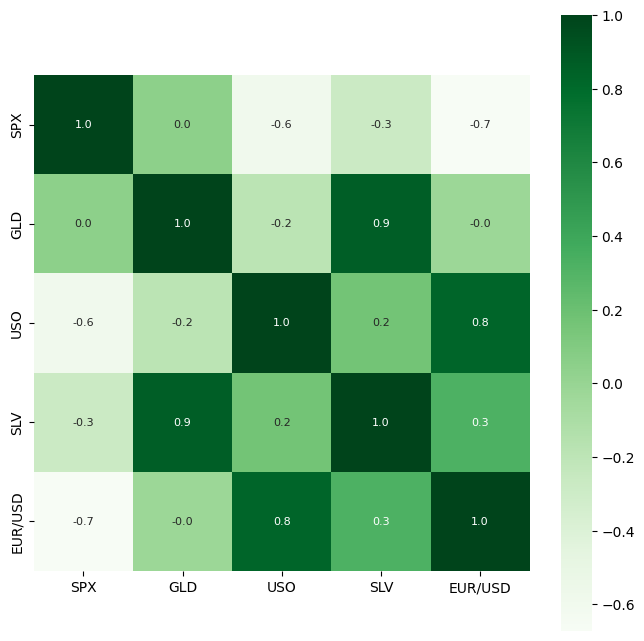

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-55-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

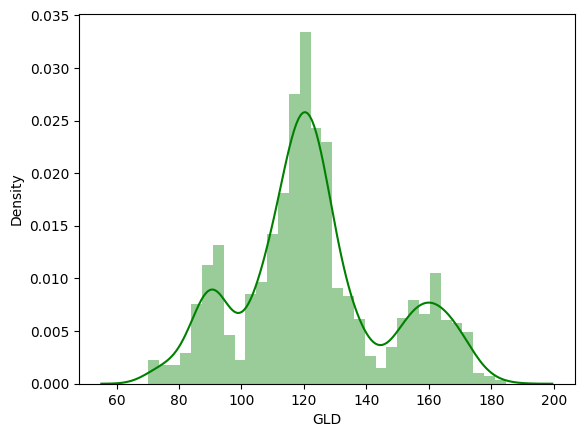

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
#split the features and target values

X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
#printing feature values
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#printing target values
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [ ]:
X_train

,SPX,USO,SLV,EUR/USD
1233,1661.319946,38.240002,22.150000,1.335399
59,1315.219971,84.370003,17.750000,1.576094
1654,2076.780029,18.930000,14.950000,1.108697
1719,2090.350098,14.690000,15.260000,1.103704
281,850.080017,27.330000,11.860000,1.300576
...,...,...,...,...
960,1354.579956,36.520000,28.379999,1.293661
905,1351.770020,38.689999,32.750000,1.323679
1096,1462.420044,33.820000,29.920000,1.319784
235,827.159973,26.910000,12.980000,1.291406


In [ ]:
X_test

,SPX,USO,SLV,EUR/USD
1971,2256.959961,11.620000,16.190001,1.054741
1163,1593.369995,33.459999,26.700001,1.311475
693,1327.219971,39.189999,33.110001,1.373438
1651,2057.639893,19.510000,15.030000,1.122297
508,1183.709961,39.369999,17.879999,1.321283
...,...,...,...,...
1921,2177.179932,10.530000,18.900000,1.121013
662,1285.959961,38.990002,29.000000,1.298398
1864,2079.060059,11.760000,16.580000,1.129102
1674,2083.560059,14.870000,13.990000,1.092705


In [ ]:
Y_train

1233    131.690002
59       91.879997
1654    111.760002
1719    110.750000
281      86.889999
           ...    
960     154.470001
905     167.509995
1096    163.169998
235      90.209999
1061    167.990005
Name: GLD, Length: 1603, dtype: float64

In [ ]:
Y_test

1971    110.820000
1163    151.050003
693     137.660004
1651    113.070000
508     114.629997
           ...    
1921    127.570000
662     135.460007
1864    122.639999
1674    104.389999
248      90.930000
Name: GLD, Length: 687, dtype: float64

In [ ]:
# **Decision Tree**
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,X_train)



DecisionTreeRegressor()

In [ ]:
dt_acc1=print("The Training accuracy of the model is {:.2f}".format(dtr.score(X_train, Y_train)))
dt_acc2=print("The Testing accuracy of the model is {:.2f}".format(dtr.score(X_test, Y_test)))

ValueError: ignored

In [ ]:
## **Linear Regressor*

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.predict(X_test)

lr_acc1=print("The Training accuracy of the model is {:.2f}".format(lr.score(X_train, Y_train)))
lr_acc2=print("The Testing accuracy of the model is {:.2f}".format(lr.score(X_test, Y_test)))

The Training accuracy of the model is 0.88
The Testing accuracy of the model is 0.88


In [ ]:
#we will train our model using random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, Y_train)

#let our model predict on test data
test_data_prediction = reg.predict(X_test)
print(test_data_prediction)

y_Pred = reg.predict(X_test)
y_Pred



[113.4411003  148.49170097 140.13539802 112.37220158 114.25389983
  95.6986993  111.51669952  93.44429966 121.06140069 127.24089973
 147.88949934 120.34859879 119.31020035  88.15000096  96.16760029
  92.66359853 116.2359007   88.83839982 125.27480083 114.64880039
 117.99979944 152.61970224 122.59979806 120.08380031 171.20990064
 108.17759876 120.84010075  87.24849849  87.90780053  88.54189931
 121.49650005 154.66510154 146.31379809 125.80420063 126.39650019
  90.47759921 155.79790054 121.56920056 106.73170067 142.87349833
  92.65449946 127.71480089 117.52860083 152.6396001  119.33099987
  91.37440189  79.80959998 120.22580158 132.10049958 119.11019972
 127.48370122 165.94290031 153.66540137  92.82329909 148.80850058
 152.05729924 113.22230139 113.19390112  87.08009899 127.8516991
 125.08080061 151.99140263 114.43799971 110.57610036 161.28679816
 117.54769853 108.26550041 131.82799958 132.5628007  125.25720006
 117.45130057 149.73790235 155.64460149 168.1375959  109.66680055
 141.824098

array([113.4411003 , 148.49170097, 140.13539802, 112.37220158,
       114.25389983,  95.6986993 , 111.51669952,  93.44429966,
       121.06140069, 127.24089973, 147.88949934, 120.34859879,
       119.31020035,  88.15000096,  96.16760029,  92.66359853,
       116.2359007 ,  88.83839982, 125.27480083, 114.64880039,
       117.99979944, 152.61970224, 122.59979806, 120.08380031,
       171.20990064, 108.17759876, 120.84010075,  87.24849849,
        87.90780053,  88.54189931, 121.49650005, 154.66510154,
       146.31379809, 125.80420063, 126.39650019,  90.47759921,
       155.79790054, 121.56920056, 106.73170067, 142.87349833,
        92.65449946, 127.71480089, 117.52860083, 152.6396001 ,
       119.33099987,  91.37440189,  79.80959998, 120.22580158,
       132.10049958, 119.11019972, 127.48370122, 165.94290031,
       153.66540137,  92.82329909, 148.80850058, 152.05729924,
       113.22230139, 113.19390112,  87.08009899, 127.8516991 ,
       125.08080061, 151.99140263, 114.43799971, 110.57

In [ ]:
rf_acc1=print("The Training accuracy of the model is {:.2f}".format(reg.score(X_train, Y_train)))
rf_acc2=print("The Testing accuracy of the model is {:.2f}".format(reg.score(X_test, Y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.98


In [ ]:
"""# **Data Scaling**"""

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

X_train_std

X_test_std

array([[ 1.15773774, -1.02732261, -0.53282495, -1.73196487],
       [-0.11970903,  0.07057796,  0.945593  ,  0.21237772],
       [-0.6320623 ,  0.35862606,  1.84727322,  0.68164669],
       ...,
       [ 0.81527076, -1.02028478, -0.47796467, -1.16880121],
       [ 0.8239335 , -0.86394454, -0.84229412, -1.4444493 ],
       [-1.8379163 , -0.38084816, -1.01390876, -0.20466526]])

In [ ]:
# **KNN model**"""

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_std, Y_train)
y_knn = knn.predict(X_test_std)

y_knn

knn_acc1=print("Training accuracy is {:.2f}".format(knn.score(X_train_std, Y_train)) )
knn_acc2=print("Testing accuracy is {:.2f} ".format(knn.score(X_test_std,Y_test)) )

Training accuracy is 1.00
Testing accuracy is 0.99 
